# Importing libraries

In [89]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()
from matplotlib.pyplot import figure

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



# Importing the dataset

In [90]:
df = pd.read_csv('Product development test.csv')

# Data Preparation

In [91]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("Numerical Features Count {}".format(len(numerical_feature)))

Numerical Features Count 2


In [92]:
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
print("Discrete feature Count {}".format(len(discrete_feature)))

Discrete feature Count 1


In [93]:
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 1


In [94]:
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Categorical feature Count {}".format(len(categorical_feature)))

Categorical feature Count 9


In [95]:
df.head(10)

,Time_of_visit,ip_address,Request_Method,Page_visited,Status_code,Country,Country_code,Main_interest,Number_of_visits,gender,Age
0,7:07:33,211.16.70.8,options,ticketing.html,200.0,China,CN,Wrestling,Daily,Male,57
1,19:43:04,133.238.193.146,head,medal_table.html,200.0,Ukraine,UA,Diving,Daily,Male,55
2,22:37:17,149.189.90.192,delete,ticketing.html,200.0,New Zealand,NZ,Rowing,Once,Male,62
3,16:02:39,8.9.187.212,get,venue.html,200.0,Philippines,PH,Football,Daily,Non-binary,22
4,23:10:08,193.179.116.149,get,medal_table.html,101.0,Indonesia,ID,Swimming,Once,Male,53
5,17:02:48,199.123.76.215,options,news.html,207.0,Brazil,BR,Diving,Once,Male,59
6,22:40:44,99.80.212.44,post,venue.html,207.0,Mexico,MX,Basketball,Often,Male,63
7,10:53:26,64.166.236.124,delete,medal_table.html,207.0,Brazil,BR,Athletics,Once,Female,48
8,15:17:59,180.45.36.164,post,news.html,200.0,Cuba,CU,Wrestling,Never,Non-binary,48
9,14:23:06,206.179.168.196,delete,venue.html,207.0,China,CN,Football,Never,Male,61


In [96]:
# Shape of the data set
df.shape

(41000, 11)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41000 entries, 0 to 40999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time_of_visit     41000 non-null  object 
 1   ip_address        41000 non-null  object 
 2   Request_Method    41000 non-null  object 
 3   Page_visited      41000 non-null  object 
 4   Status_code       41000 non-null  float64
 5   Country           41000 non-null  object 
 6   Country_code      40978 non-null  object 
 7   Main_interest     41000 non-null  object 
 8   Number_of_visits  41000 non-null  object 
 9   gender            41000 non-null  object 
 10  Age               41000 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 3.4+ MB


In [98]:
# Check for missing values
df.isnull().sum()

Time_of_visit        0
ip_address           0
Request_Method       0
Page_visited         0
Status_code          0
Country              0
Country_code        22
Main_interest        0
Number_of_visits     0
gender               0
Age                  0
dtype: int64

In [99]:
# Removing missing values
df1= df.dropna()


In [100]:
df1.isnull().sum()

Time_of_visit       0
ip_address          0
Request_Method      0
Page_visited        0
Status_code         0
Country             0
Country_code        0
Main_interest       0
Number_of_visits    0
gender              0
Age                 0
dtype: int64

# Exploratory Data Analysis

In [101]:
#total number of website visits by sports
visits_counts = df.groupby('Main_interest')['Number_of_visits'].count().reset_index().sort_values(by='Number_of_visits', ascending=False)

In [102]:
# top 15 sports by Number of visits count
top_15_visits_counts = visits_counts[:15]

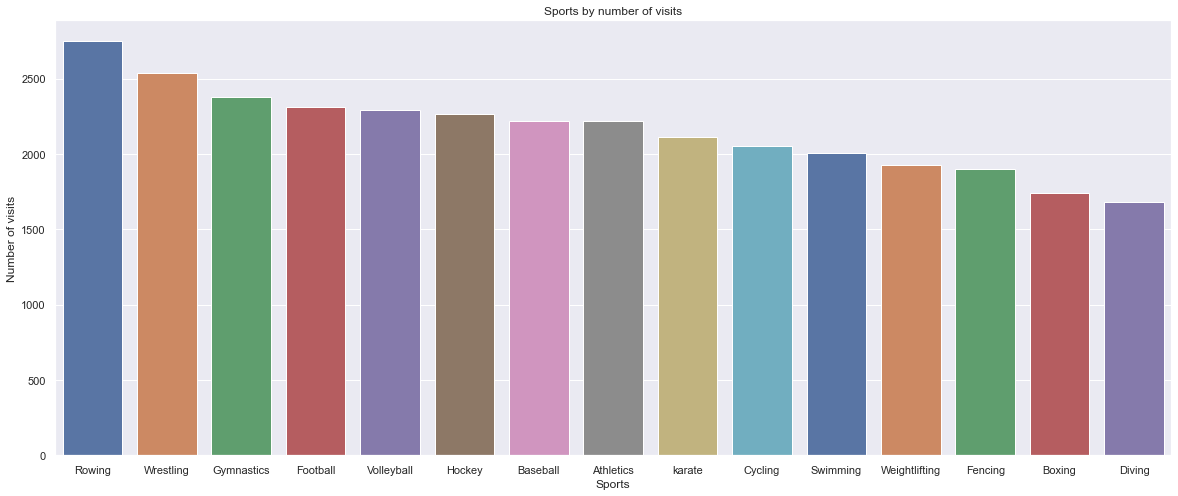

In [103]:
# bar graph showing sports by number of visits
plt.figure(figsize=(20,8))
sns.barplot(x='Main_interest', y='Number_of_visits', data=top_15_visits_counts, palette='deep')
plt.title('Sports by number of visits')
plt.xlabel('Sports')
plt.ylabel('Number of visits')
plt.show()

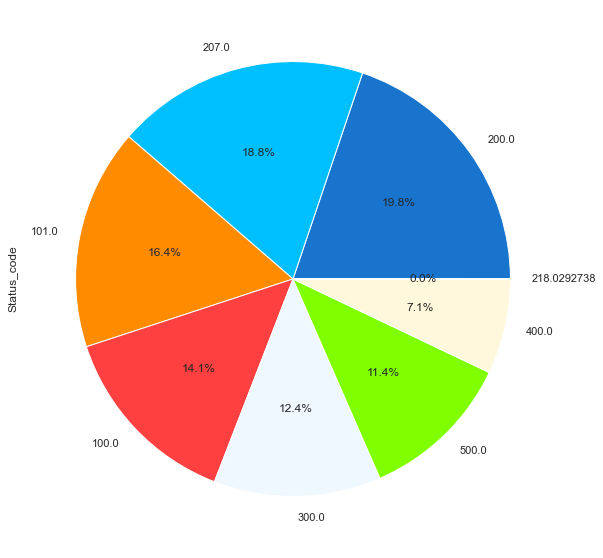

In [104]:
# Pie chart showing status code

colors =  ["#1874CD", "#00BFFF","#FF8C00","#FF4040","#F0F8FF","#7FFF00","#FFF8DC","#BF3EFF"]
ax= df['Status_code'].value_counts(ascending=False).plot.pie(colors=colors,
            autopct='%1.1f%%',
            figsize=(15, 10)) 
plt.show()

<AxesSubplot:>

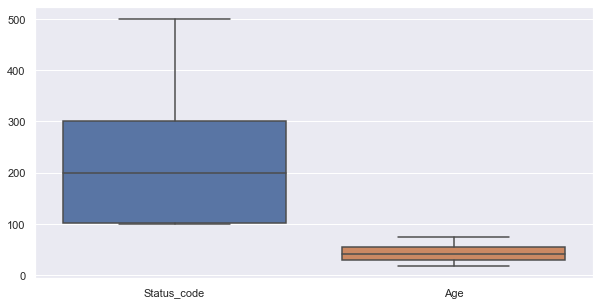

In [105]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df)

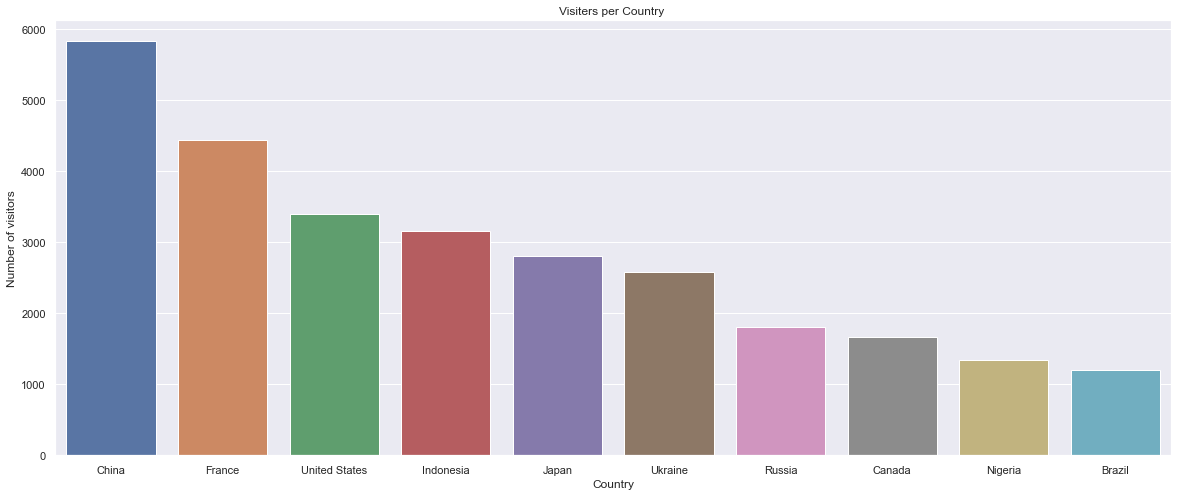

In [106]:
# bar graph showing top 10 Countries by number of visits
Country_visits = df.groupby('Country')['Country_code'].count().reset_index().sort_values(by='Country_code', ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x='Country', y='Country_code', data=Country_visits[:10], palette='deep')
plt.title('Visiters per Country ')
plt.xlabel('Country')
plt.ylabel('Number of visitors')
plt.show()

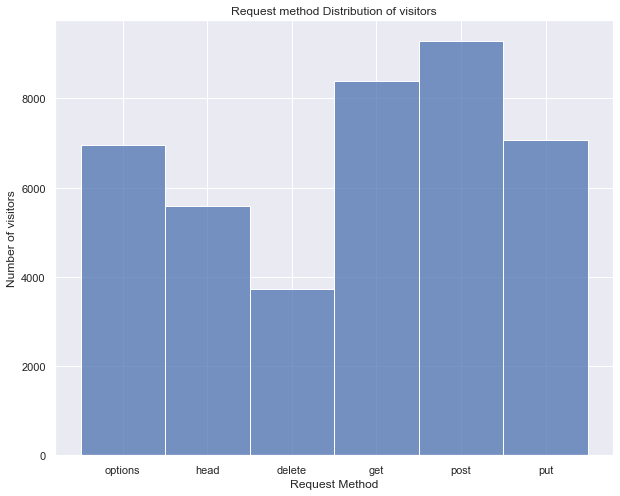

In [107]:
# Histogram showing request methods by number of visitors
plt.figure(figsize=(10,8))
sns.histplot(x='Request_Method', data=df, bins=20)
plt.title('Request method Distribution of visitors')
plt.xlabel('Request Method')
plt.ylabel('Number of visitors')
plt.show()

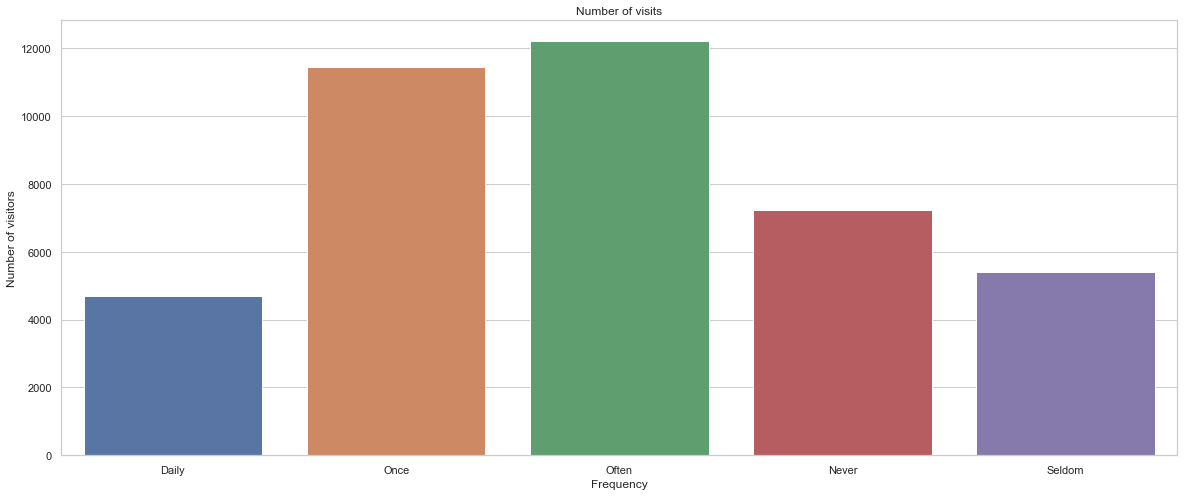

In [108]:
# Count plot showing frequency of visits 
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))
sns.countplot(x='Number_of_visits', data=df)
plt.title('Number of visits')
plt.xlabel('Frequency')
plt.ylabel('Number of visitors')
plt.show()

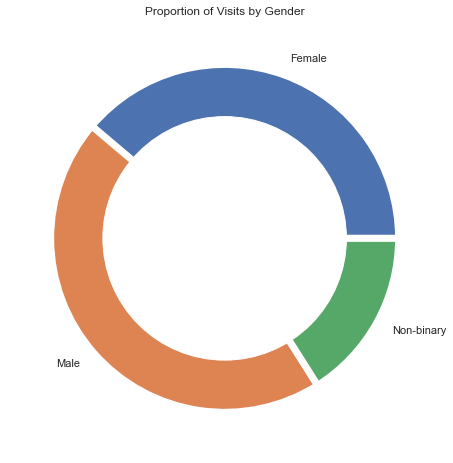

In [109]:
# Donut chart showing gender 
visits_by_gender = df.groupby('gender')['Number_of_visits'].count().reset_index()
visits_by_gender['Proportion'] = visits_by_gender['Number_of_visits'] / visits_by_gender['Number_of_visits'].sum()
plt.figure(figsize=(8,8))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(visits_by_gender['Proportion'], labels=visits_by_gender['gender'], wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p=plt.gcf() 
p.gca().add_artist(my_circle)
plt.title('Proportion of Visits by Gender')
plt.show()

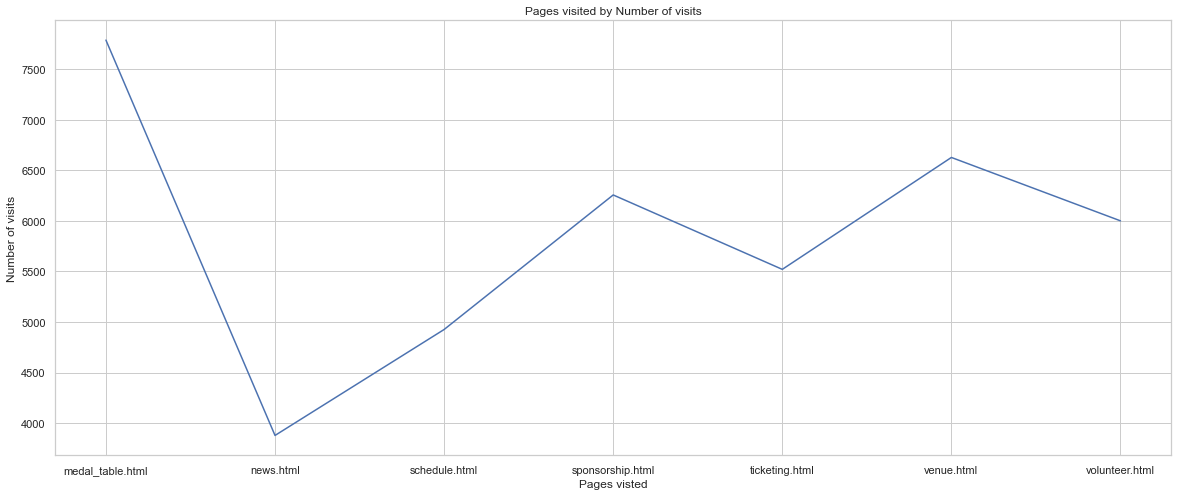

In [110]:
# line graph showing pages visted 
page_counts = df.groupby('Page_visited')['Number_of_visits'].count().reset_index()
plt.figure(figsize=(20,8))
sns.lineplot(x='Page_visited', y='Number_of_visits', data=page_counts)
plt.title('Pages visited by Number of visits')
plt.xlabel('Pages visted')
plt.ylabel('Number of visits')
plt.show()

# Linear Regression

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [112]:
le = LabelEncoder()
df1['Status_code'] = le.fit_transform(df1['Status_code'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7648\124047556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Status_code'] = le.fit_transform(df1['Status_code'])


In [113]:
X = df1[['Age', 'Status_code']]
y = df1['Age']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [116]:
y_pred = lr.predict(X_test)

In [117]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse}')

Mean squared error: 1.3863804216471541e-26


# Clustering

In [118]:
# Create a subset of the data with only numerical columns
df1_numeric = df1[['Age', 'Status_code']]

In [119]:
# Standardize the numerical data
scaler = StandardScaler()
df1_numeric_std = scaler.fit_transform(df1_numeric)

In [120]:
# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
df1_numeric_pca = pca.fit_transform(df1_numeric_std)

In [121]:
# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1_numeric_pca)
    sse.append(kmeans.inertia_)

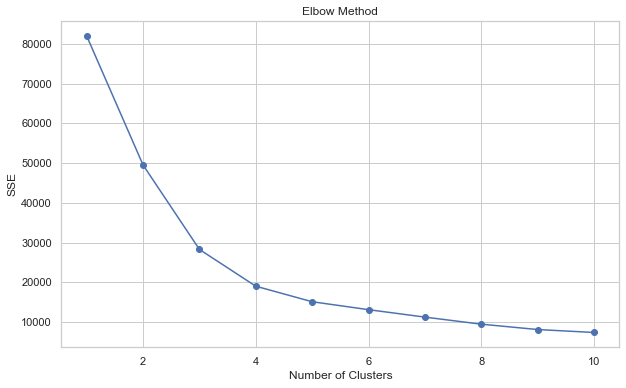

In [122]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [123]:
# Fit the K-Means clustering model with the optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df1_numeric_pca)

KMeans(n_clusters=4, random_state=42)

In [124]:
# Add the cluster labels to the DataFrame
df1['Cluster'] = kmeans.labels_

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7648\420677034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Cluster'] = kmeans.labels_


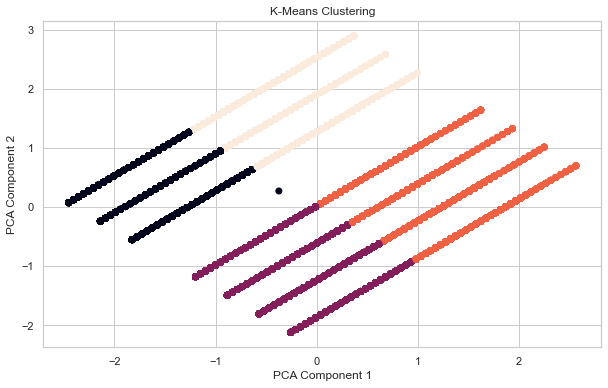

In [125]:
# Create a scatter plot of the data with different colors for each cluster
plt.figure(figsize=(10,6))
plt.scatter(df1_numeric_pca[:,0], df1_numeric_pca[:,1], c=kmeans.labels_)
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


# Diaplay the dashboard

In [126]:
from IPython.display import IFrame
Dashboard = IFrame(src= "https://app.powerbi.com/view?r=eyJrIjoiYmI1NTYzYmYtMTkwNy00ODg1LWIwMDItMDhjZjg0YjJlY2JkIiwidCI6ImVlMjkyOTc3LTdiNTgtNGRmNC04MTM4LTUwZDBkZTdkMjhkOCIsImMiOjh9", height = 700, width = 1000)
display(Dashboard)